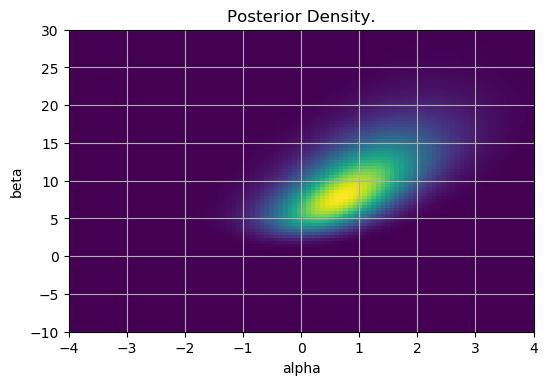

Effective sample size (S_eff):  1424.25167669

Posterior mean of alpha:  0.997310434433
Posterior mean of beta:  10.6146468924


In [1]:
'''
Assignment 4
'''

%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import multivariate_normal

mpl.rcParams['figure.dpi']=100

# seed a random state
rng = np.random.RandomState(0)

# Data
x = np.array([-0.86, -0.30, -0.05, 0.73])
n = np.array([5, 5, 5, 5])
y = np.array([0, 1, 3, 5])

#
#Calculation of the posterior distribution in a grid of points and plt a heatmap of the density
#
alpha = np.linspace(-4, 4, 100)
beta = np.linspace(-10, 30, 100)

#Inverse logit function
logit_inverse = 1 / (1 + np.exp(-(alpha[:,None] + beta[:,None,None] * x)))
#Likelihood
likelihood = np.prod(logit_inverse**y * (1 - logit_inverse)**(n - y), axis=2)

#Joint normal prior distribution parameters --> bivariate normal distribution parameters (prior)
mu_alpha = 0 
mu_beta = 10
sigma_alpha = 2
sigma_beta = 10
#correlation
p = 0.5 

mean = np.array([mu_alpha,mu_beta])
covariance = np.array([[sigma_alpha**2,p*sigma_alpha*sigma_beta],[p*sigma_alpha*sigma_beta,sigma_beta**2]])

prior = multivariate_normal(mean,covariance)

#Grid of points using alpha and beta
xv,yv = np.meshgrid(alpha,beta)
pos = np.empty(xv.shape + (2,))
pos[:, :, 0] = xv
pos[:, :, 1] = yv

#Prior distribution for the grid of points 
prior_dist = prior.pdf(pos)

#Posterior distribution
posterior = np.multiply(prior_dist,likelihood)

#Heatmap plotting of the posterior distribution
plt.imshow(posterior,origin='lower', aspect='auto', extent=(alpha[0], alpha[-1], beta[0], beta[-1]))
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Posterior Density.')
plt.grid(True)
plt.show()

#
#Sample draws of alpha and beta from the prior distribution
#

# Sample 5000 values from the prior 
sample_values = 5000
samples = prior.rvs(sample_values)

#
#Importance ratios for each draw
#
#Inverse logit function for pairs of alpha and beta
logit_inverse_alpha_beta = 1 / (1 + np.exp(-(samples[:,0,None] + samples[:,1,None] * x)))

#Likelihood weights 
weights = np.prod(logit_inverse_alpha_beta**y * (1 - logit_inverse_alpha_beta)**(n - y), axis=1)
weights_norm = (weights)/np.sum(weights)

#
#Effective sample size
#
S_eff = 1/np.sum(weights_norm**2)
print("Effective sample size (S_eff): ",S_eff)

#
#Importance mean using importance sampling
#
mean_posterior = sum(weights[:,None]*samples)/sum(weights)
print("\nPosterior mean of alpha: ",mean_posterior[0])
print("Posterior mean of beta: ",mean_posterior[1])

#
#Importance resampling to obtain a posterior sample of 1000
#
ind=rng.choice(a=sample_values,size=1000,replace=False,p=weights_norm)
resamples = samples[ind]


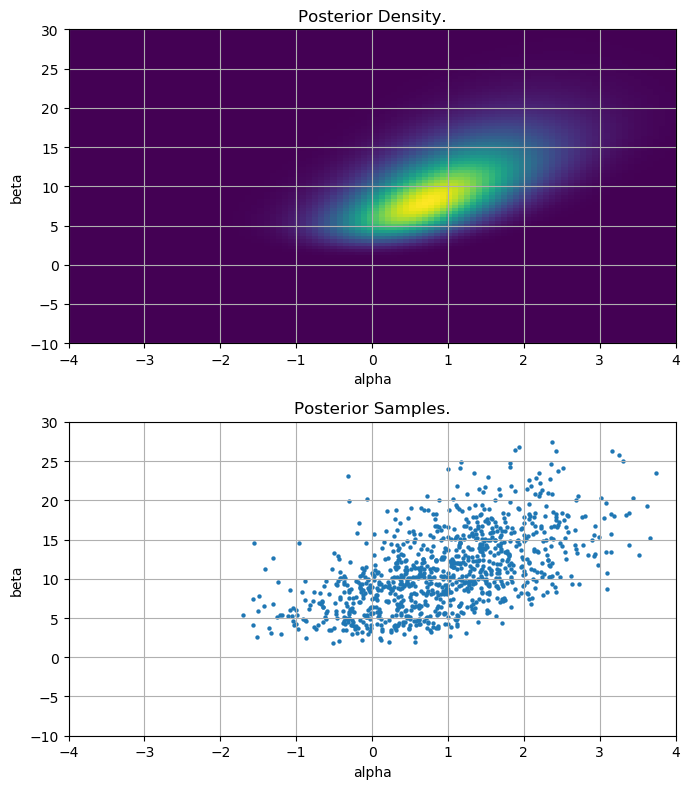

In [52]:
#
#Using the posterior sample obtained via importance sampling
#

#Scatter plotting of the posterior samples
fig, axes = plt.subplots(2, 1, figsize=(7, 8))

#Posterior density
ax = axes[0]
ax.imshow(posterior, origin='lower', aspect='auto', extent=(alpha[0], alpha[-1], beta[0], beta[-1]))
ax.set_xlim([-4,4])
ax.set_ylim([-10,30])
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.grid(True)
ax.set_title('Posterior Density.')

#Posterior samples
ax = axes[1]
ax.scatter(resamples[:,0], resamples[:,1], 10, linewidth=0)
ax.set_xlim([-4,4])
ax.set_ylim([-10,30])
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_title('Posterior Samples.')
ax.grid(True)

fig.tight_layout()


Probability that the drug is harmful (p(beta>0|x,n,y)):  1.0


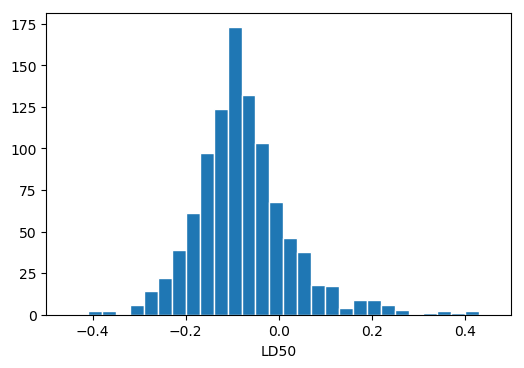

In [54]:
#
#Report an estimate for p(beta>0|x,n,y)
#
beta_samples = resamples[:,1]
alpha_samples = resamples[:,0]
beta_pos = beta_samples>0
prob = (beta_samples[beta_pos].size/beta_samples.size)
print("Probability that the drug is harmful (p(beta>0|x,n,y)): ",prob)

#
#Histogram of the draws from the posterior distribution of the LD50 conditionasl on beta>0
#
samples_ld50 = -alpha_samples[beta_pos]/beta_samples[beta_pos]
plt.hist(samples_ld50, np.arange(-0.5, 0.51, 0.03), ec='white')
plt.xlim([-0.5, 0.5])
plt.xlabel('LD50')
plt.show()

